In [1]:
from typing import List, Dict
from collections import Counter
import math

import matplotlib.pyplot as plt

In [2]:
def bucketize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

In [3]:
def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

In [4]:
def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)

In [5]:
import random
import import_ipynb
from probability import inverse_normal_cdf

importing Jupyter notebook from probability.ipynb


<Figure size 432x288 with 0 Axes>

In [6]:
def random_normal() -> float:
    """Returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

In [7]:
xs = [random_normal() for _ in range(1000)]
print(len(xs))
xs[:2] 

1000


[0.5333042144775391, -1.0316753387451172]

In [8]:
ys1 = [ x + random_normal() / 2 for x in xs]
print(len(ys1))
ys1[:2]

1000


[0.7426023483276367, -1.0228204727172852]

In [9]:
ys2 = [-x + random_normal() / 2 for x in xs]
print(len(ys2))
ys2[:2]

1000


[-1.753706932067871, 1.0366201400756836]

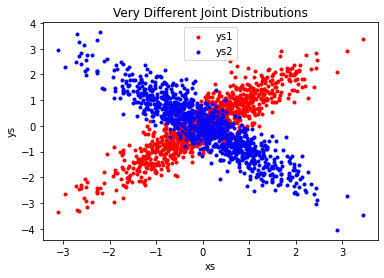

In [10]:
plt.scatter(xs, ys1, marker='.', color='red', label='ys1')
plt.scatter(xs, ys2, marker='.', color='blue',  label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
#plt.show()


plt.savefig('images/working_scatter.png')

In [11]:
plt.gca().clear()
plt.close()
plt.clf()

<Figure size 432x288 with 0 Axes>

In [12]:
from statisticas import correlation

importing Jupyter notebook from statisticas.ipynb
importing Jupyter notebook from linear_algebra.ipynb


<Figure size 432x288 with 0 Axes>

In [13]:
correlation(xs, ys1)

0.8952814761261199

In [14]:
assert 0.88 < correlation(xs, ys1) < 0.91

In [15]:
correlation(xs, ys2)

-0.8940874392631807

In [16]:
assert -0.91 < correlation(xs, ys2) < -0.86

In [17]:
from linear_algebra import Matrix, Vector, make_matrix

In [18]:
def correlation_matrix(data: List[Vector]) -> Matrix:
    """
    Returns the len(data) x len(data) matrix whose (i, j)-th entry
    is the correlation between data[i] and data[j]
    """
    def correlation_ij(i: int, j: int) -> float:
        return correlation(data[i], data[j])

    return make_matrix(len(data), len(data), correlation_ij)

In [19]:
vectors = [xs, ys1, ys2]

In [20]:
assert correlation_matrix(vectors) == [
    [correlation(xs,  xs), correlation(xs,  ys1), correlation(xs,  ys2)],
    [correlation(ys1, xs), correlation(ys1, ys1), correlation(ys1, ys2)],
    [correlation(ys2, xs), correlation(ys2, ys1), correlation(ys2, ys2)],
]

In [21]:
import datetime

In [22]:
stock_price = {'closing_price': 102.06,
               'date': datetime.date(2014, 8, 29),
               'symbol': 'AAPL'}
stock_price

{'closing_price': 102.06, 'date': datetime.date(2014, 8, 29), 'symbol': 'AAPL'}

In [23]:
# oops, typo
stock_price['cosing_price'] = 103.06
stock_price

{'closing_price': 102.06,
 'date': datetime.date(2014, 8, 29),
 'symbol': 'AAPL',
 'cosing_price': 103.06}

In [24]:
prices: Dict[datetime.date, float] = {}

In [25]:
from typing import NamedTuple

In [26]:
class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

In [27]:
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)
price

StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.03)

In [28]:
assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

In [29]:
from dateutil.parser import parse

In [30]:
def parse_row(row: List[str]) -> StockPrice:
    symbol, date, closing_price = row
    return StockPrice(symbol=symbol,
                      date=parse(date).date(),
                      closing_price=float(closing_price))

In [31]:
# Now test our function
stock = parse_row(["MSFT", "2018-12-14", "106.03"])
stock

StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.03)

In [32]:
assert stock.symbol == "MSFT"
assert stock.date == datetime.date(2018, 12, 14)
assert stock.closing_price == 106.03

In [33]:
from typing import Optional
import re

In [34]:
def try_parse_row(row: List[str]) -> Optional[StockPrice]:
    symbol, date_, closing_price_ = row

    # Stock symbol should be all capital letters
    if not re.match(r"^[A-Z]+$", symbol):
        return None

    try:
        date = parse(date_).date()
    except ValueError:
        return None

    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None

    return StockPrice(symbol, date, closing_price)

In [35]:
# Should return None for errors
assert try_parse_row(["MSFT0", "2018-12-14", "106.03"]) is None
assert try_parse_row(["MSFT", "2018-12--14", "106.03"]) is None
assert try_parse_row(["MSFT", "2018-12-14", "x"]) is None

In [36]:
# But should return same as before if data is good.
assert try_parse_row(["MSFT", "2018-12-14", "106.03"]) == stock

In [37]:
from dateutil.parser import parse
import csv

In [38]:
stocks = dict(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.03)
stocks

{'symbol': 'MSFT',
 'date': datetime.date(2018, 12, 14),
 'closing_price': 106.03}

In [39]:
with open("stocks.csv", "r") as f:
    reader = csv.DictReader(f)
    rows = [[row['Symbol'], row['Date'], row['Close']]
            for row in reader]

In [40]:
# skip header
maybe_data = [try_parse_row(row) for row in rows]

In [41]:
maybe_data[:3]

[StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 12), closing_price=0.513393),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 15), closing_price=0.486607),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 16), closing_price=0.450893)]

In [42]:
# Make sure they all loaded successfully:
assert maybe_data
assert all(sp is not None for sp in maybe_data)

In [43]:
# This is just to make mypy happy
data = [sp for sp in maybe_data if sp is not None]
print(len(data))
data[:3]

23105


[StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 12), closing_price=0.513393),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 15), closing_price=0.486607),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 16), closing_price=0.450893)]

In [44]:
stock_price

{'closing_price': 102.06,
 'date': datetime.date(2014, 8, 29),
 'symbol': 'AAPL',
 'cosing_price': 103.06}

In [45]:
max_aapl_price = max(stock_price.closing_price
                     for stock_price in data
                     if stock_price.symbol == "AAPL")
max_aapl_price

232.070007

In [46]:
from collections import defaultdict

In [47]:
max_prices: Dict[str, float] = defaultdict(lambda: float('-inf'))
max_prices

defaultdict(<function __main__.<lambda>()>, {})

In [48]:
for sp in data:
    symbol, closing_price = sp.symbol, sp.closing_price
    if closing_price > max_prices[symbol]:
        max_prices[symbol] = closing_price
max_prices

defaultdict(<function __main__.<lambda>()>,
            {'AAPL': 232.070007,
             'MSFT': 115.610001,
             'FB': 217.5,
             'GOOG': 1268.329956})

In [49]:
from typing import List
from collections import defaultdict

In [50]:
# Collect the prices by symbol
prices: Dict[str, List[StockPrice]] = defaultdict(list)
prices

defaultdict(list, {})

In [51]:
for sp in data:
    prices[sp.symbol].append(sp)

In [52]:
# Order the prices by date
prices = {symbol: sorted(symbol_prices)
          for symbol, symbol_prices in prices.items()}

In [53]:
def pct_change(yesterday: StockPrice, today: StockPrice) -> float:
    return today.closing_price / yesterday.closing_price - 1

In [54]:
class DailyChange(NamedTuple):
    symbol: str
    date: datetime.date
    pct_change: float

In [55]:
def day_over_day_changes(prices: List[StockPrice]) -> List[DailyChange]:
    """
    Assumes prices are for one stock and are in order
    """
    return [DailyChange(symbol=today.symbol,
                        date=today.date,
                        pct_change=pct_change(yesterday, today))
            for yesterday, today in zip(prices, prices[1:])]

In [56]:
all_changes = [change
               for symbol_prices in prices.values()
               for change in day_over_day_changes(symbol_prices)]
all_changes[:3]

[DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 15), pct_change=-0.05217445504710816),
 DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 16), pct_change=-0.07339392980372261),
 DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 17), pct_change=0.0247531010683244)]

In [57]:
max_change = max(all_changes, key=lambda change: change.pct_change)
max_change

DailyChange(symbol='AAPL', date=datetime.date(1997, 8, 6), pct_change=0.33227854830957937)

In [58]:
assert max_change.symbol == 'AAPL'
print(f'{max_change.symbol}\n')

assert max_change.date == datetime.date(1997, 8, 6)
print(f'{max_change.date}\n')

assert 0.33 < max_change.pct_change < 0.34
print(f'{max_change.pct_change}\n')

AAPL

1997-08-06

0.33227854830957937



In [59]:
min_change = min(all_changes, key=lambda change: change.pct_change)
min_change

DailyChange(symbol='AAPL', date=datetime.date(2000, 9, 29), pct_change=-0.5186915679972073)

In [60]:
# see, e.g. http://money.cnn.com/2000/09/29/markets/techwrap/
assert min_change.symbol == 'AAPL'
print(f'{min_change.symbol}\n')

assert min_change.date == datetime.date(2000, 9, 29)
print(f'{min_change.date}\n')

assert -0.52 < min_change.pct_change < -0.51
print(f'{min_change.pct_change}\n')

AAPL

2000-09-29

-0.5186915679972073



In [61]:
changes_by_month: List[DailyChange] = {month: [] for month in range(1, 13)}
changes_by_month

{1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: []}

In [62]:
all_changes[:3]

[DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 15), pct_change=-0.05217445504710816),
 DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 16), pct_change=-0.07339392980372261),
 DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 17), pct_change=0.0247531010683244)]

In [63]:
for change in all_changes:
    changes_by_month[change.date.month].append(change)  

In [64]:
avg_daily_change = {
    month: sum(change.pct_change for change in changes) / len(changes)
    for month, changes in changes_by_month.items()
}
avg_daily_change

{1: 0.0021865911307884013,
 2: 0.00014320928359588448,
 3: 0.0009950657322022312,
 4: 0.0017246603289960414,
 5: 0.001045801424244935,
 6: -0.00038890680439638084,
 7: 0.0008653144845121465,
 8: 0.0012329314091353012,
 9: -4.63670330797049e-06,
 10: 0.002905423893850083,
 11: 0.0008081709427041247,
 12: 0.0009192394682663616}

In [65]:
# October is the best month
assert avg_daily_change[10] == max(avg_daily_change.values())

print(max(avg_daily_change.values()))
avg_daily_change[10]

0.002905423893850083


0.002905423893850083

In [66]:
from linear_algebra import distance

In [67]:
a_to_b = distance([63, 150], [67, 160])        # 10.77
a_to_c = distance([63, 150], [70, 171])        # 22.14
b_to_c = distance([67, 160], [70, 171])        # 11.40

In [68]:
round(a_to_b,6),round(a_to_c,6),round(b_to_c,6)  

(10.77033, 22.135944, 11.401754)

In [69]:
a_to_b = distance([160, 150], [170.2, 160])    # 14.28
a_to_c = distance([160, 150], [177.8, 171])    # 27.53
b_to_c = distance([170.2, 160], [177.8, 171])  # 13.37

In [70]:
round(a_to_b,6),round(a_to_c,6),round(b_to_c,6) 

(14.284257, 27.528894, 13.370116)

In [71]:
from typing import Tuple

from linear_algebra import vector_mean, sum_of_squares
from statisticas import standard_deviation

In [72]:
def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """returns the means and standard deviations for each position"""
    dim = len(data[0])

    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data])
              for i in range(dim)]

    return means, stdevs

In [73]:
vectors = [[-3, -1, 1], [-1, 0, 1], [1, 1, 1]]
means, stdevs = scale(vectors)
assert means == [-1, 0, 1]
assert stdevs == [2, 1, 0]

print(means)
stdevs

[-1.0, 0.0, 1.0]


[2.0, 1.0, 0.0]

In [74]:
def rescale(data: List[Vector]) -> List[Vector]:
    """
    Rescales the input data so that each position has
    mean 0 and standard deviation 1. (Leaves a position
    as is if its standard deviation is 0.)
    """
    dim = len(data[0])
    means, stdevs = scale(data)

    # Make a copy of each vector
    rescaled = [v[:] for v in data]

    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i]) / stdevs[i]

    return rescaled

In [75]:
print(data[0])
rescaled = [v[:] for v in data]
rescaled[0]

StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 12), closing_price=0.513393)


('AAPL', datetime.date(1980, 12, 12), 0.513393)

In [76]:
means, stdevs = scale(rescale(vectors))
assert means == [0, 0, 1]
assert stdevs == [1, 1, 0]

print(means)
stdevs

[0.0, 0.0, 1.0]


[1.0, 1.0, 0.0]

In [77]:
import tqdm

In [78]:
pca_data = [
[20.9666776351559,-13.1138080189357],
[22.7719907680008,-19.8890894944696],
[25.6687103160153,-11.9956004517219],
[18.0019794950564,-18.1989191165133],
[21.3967402102156,-10.8893126308196],
[0.443696899177716,-19.7221132386308],
[29.9198322142127,-14.0958668502427],
[19.0805843080126,-13.7888747608312],
[16.4685063521314,-11.2612927034291],
[21.4597664701884,-12.4740034586705],
[3.87655283720532,-17.575162461771],
[34.5713920556787,-10.705185165378],
[13.3732115747722,-16.7270274494424],
[20.7281704141919,-8.81165591556553],
[24.839851437942,-12.1240962157419],
[20.3019544741252,-12.8725060780898],
[21.9021426929599,-17.3225432396452],
[23.2285885715486,-12.2676568419045],
[28.5749111681851,-13.2616470619453],
[29.2957424128701,-14.6299928678996],
[15.2495527798625,-18.4649714274207],
[26.5567257400476,-9.19794350561966],
[30.1934232346361,-12.6272709845971],
[36.8267446011057,-7.25409849336718],
[32.157416823084,-10.4729534347553],
[5.85964365291694,-22.6573731626132],
[25.7426190674693,-14.8055803854566],
[16.237602636139,-16.5920595763719],
[14.7408608850568,-20.0537715298403],
[6.85907008242544,-18.3965586884781],
[26.5918329233128,-8.92664811750842],
[-11.2216019958228,-27.0519081982856],
[8.93593745011035,-20.8261235122575],
[24.4481258671796,-18.0324012215159],
[2.82048515404903,-22.4208457598703],
[30.8803004755948,-11.455358009593],
[15.4586738236098,-11.1242825084309],
[28.5332537090494,-14.7898744423126],
[40.4830293441052,-2.41946428697183],
[15.7563759125684,-13.5771266003795],
[19.3635588851727,-20.6224770470434],
[13.4212840786467,-19.0238227375766],
[7.77570680426702,-16.6385739839089],
[21.4865983854408,-15.290799330002],
[12.6392705930724,-23.6433305964301],
[12.4746151388128,-17.9720169566614],
[23.4572410437998,-14.602080545086],
[13.6878189833565,-18.9687408182414],
[15.4077465943441,-14.5352487124086],
[20.3356581548895,-10.0883159703702],
[20.7093833689359,-12.6939091236766],
[11.1032293684441,-14.1383848928755],
[17.5048321498308,-9.2338593361801],
[16.3303688220188,-15.1054735529158],
[26.6929062710726,-13.306030567991],
[34.4985678099711,-9.86199941278607],
[39.1374291499406,-10.5621430853401],
[21.9088956482146,-9.95198845621849],
[22.2367457578087,-17.2200123442707],
[10.0032784145577,-19.3557700653426],
[14.045833906665,-15.871937521131],
[15.5640911917607,-18.3396956121887],
[24.4771926581586,-14.8715313479137],
[26.533415556629,-14.693883922494],
[12.8722580202544,-21.2750596021509],
[24.4768291376862,-15.9592080959207],
[18.2230748567433,-14.6541444069985],
[4.1902148367447,-20.6144032528762],
[12.4332594022086,-16.6079789231489],
[20.5483758651873,-18.8512560786321],
[17.8180560451358,-12.5451990696752],
[11.0071081078049,-20.3938092335862],
[8.30560561422449,-22.9503944138682],
[33.9857852657284,-4.8371294974382],
[17.4376502239652,-14.5095976075022],
[29.0379635148943,-14.8461553663227],
[29.1344666599319,-7.70862921632672],
[32.9730697624544,-15.5839178785654],
[13.4211493998212,-20.150199857584],
[11.380538260355,-12.8619410359766],
[28.672631499186,-8.51866271785711],
[16.4296061111902,-23.3326051279759],
[25.7168371582585,-13.8899296143829],
[13.3185154732595,-17.8959160024249],
[3.60832478605376,-25.4023343597712],
[39.5445949652652,-11.466377647931],
[25.1693484426101,-12.2752652925707],
[25.2884257196471,-7.06710309184533],
[6.77665715793125,-22.3947299635571],
[20.1844223778907,-16.0427471125407],
[25.5506805272535,-9.33856532270204],
[25.1495682602477,-7.17350567090738],
[15.6978431006492,-17.5979197162642],
[37.42780451491,-10.843637288504],
[22.974620174842,-10.6171162611686],
[34.6327117468934,-9.26182440487384],
[34.7042513789061,-6.9630753351114],
[15.6563953929008,-17.2196961218915],
[25.2049825789225,-14.1592086208169]
]

In [79]:
from linear_algebra import subtract

In [80]:
def de_mean(data: List[Vector]) -> List[Vector]:
    """Recenters the data to have mean 0 in every dimension"""
    mean = vector_mean(data)
    return [subtract(vector, mean) for vector in data]

In [81]:
from linear_algebra import magnitude

In [82]:
def direction(w: Vector) -> Vector:
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

In [83]:
from linear_algebra import dot

In [84]:
def directional_variance(data: List[Vector], w: Vector) -> float:
    """
    Returns the variance of x in the direction of w
    """
    w_dir = direction(w)
    return sum(dot(v, w_dir) ** 2 for v in data)

In [85]:
def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
    """
    The gradient of directional variance with respect to w
    """
    w_dir = direction(w)
    return [sum(2 * dot(v, w_dir) * v[i] for v in data)
            for i in range(len(w))]

In [86]:
from gradient_descent import gradient_step

importing Jupyter notebook from gradient_descent.ipynb


In [87]:
def first_principal_component(data: List[Vector],
                              n: int = 100,
                              step_size: float = 0.1) -> Vector:
    # Start with a random guess
    guess = [1.0 for _ in data[0]]

    with tqdm.trange(n) as t:
        for _ in t:
            dv = directional_variance(data, guess)
            gradient = directional_variance_gradient(data, guess)
            guess = gradient_step(guess, gradient, step_size)
            t.set_description(f"dv: {dv:.3f}")

    return direction(guess)

In [88]:
from linear_algebra import scalar_multiply

In [89]:
def project(v: Vector, w: Vector) -> Vector:
    """return the projection of v onto the direction w"""
    projection_length = dot(v, w)
    return scalar_multiply(projection_length, w)

In [90]:
from linear_algebra import subtract

In [91]:
def remove_projection_from_vector(v: Vector, w: Vector) -> Vector:
    """projects v onto w and subtracts the result from v"""
    return subtract(v, project(v, w))

In [92]:
def remove_projection(data: List[Vector], w: Vector) -> List[Vector]:
    return [remove_projection_from_vector(v, w) for v in data]

In [93]:
def pca(data: List[Vector], num_components: int) -> List[Vector]:
    components: List[Vector] = []
    for _ in range(num_components):
        component = first_principal_component(data)
        components.append(component)
        data = remove_projection(data, component)

    return components

In [94]:
def transform_vector(v: Vector, components: List[Vector]) -> Vector:
    return [dot(v, w) for w in components]

In [95]:
def transform(data: List[Vector], components: List[Vector]) -> List[Vector]:
    return [transform_vector(v, components) for v in data]

In [96]:
# def main():

#     # I don't know why this is necessary
#     plt.gca().clear()
#     plt.close()

In [97]:
import random
from probability import inverse_normal_cdf

In [98]:
random.seed(0)

In [99]:
 # uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]
uniform[:3]

[68.88437030500961, 51.590880588060486, -15.885683833830996]

In [100]:
# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random())
              for _ in range(10000)]
normal[:3]

[50.763559341430664, 18.96437644958496, 21.814985275268555]

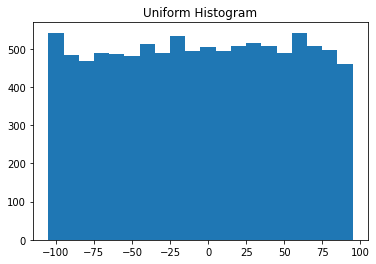

In [101]:
plot_histogram(uniform,10, "Uniform Histogram")
plt.savefig('images/working_histogram_uniform.png')

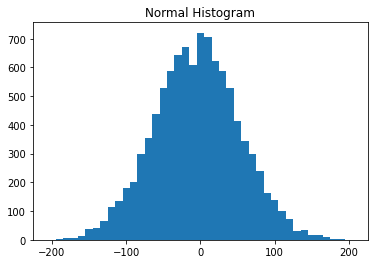

In [102]:
plot_histogram(normal, 10, "Normal Histogram")
plt.savefig('images/working_histogram_normal.png')

In [103]:
from statisticas import correlation

In [104]:
print(correlation(xs, ys1))      # about 0.9
print(correlation(xs, ys2))      # about -0.9

0.8952814761261199
-0.8940874392631807


In [105]:
from typing import List

In [106]:
# Just some random data to show off correlation scatterplots
num_points = 100

In [107]:
def random_row() -> List[float]:
        row = [0.0, 0, 0, 0]
        row[0] = random_normal()
        row[1] = -5 * row[0] + random_normal()
        row[2] = row[0] + row[1] + 5 * random_normal()
        row[3] = 6 if row[2] > -2 else 0
        return row

In [108]:
random.seed(0)
# each row has 4 points, but really we want the columns
corr_rows = [random_row() for _ in range(num_points)]
corr_rows[:3]

[[1.0127925872802734, -4.364223480224609, -4.353599548339844, 0],
 [-0.6466960906982422, 3.261737823486328, 1.4120292663574219, 6],
 [0.7850933074951172, -4.440364837646484, -3.9487648010253906, 0]]

In [109]:
corr_data = [list(col) for col in zip(*corr_rows)]

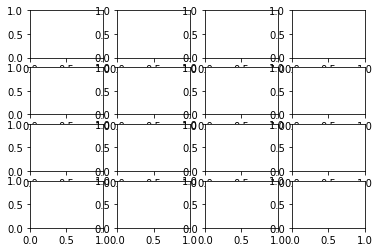

In [110]:
# corr_data is a list of four 100-d vectors
num_vectors = len(corr_data)
fig, ax = plt.subplots(num_vectors, num_vectors)

In [111]:
num_vectors

4

In [112]:
for i in range(num_vectors):
        for j in range(num_vectors):

            # Scatter column_j on the x-axis vs column_i on the y-axis,
            if i != j: ax[i][j].scatter(corr_data[j], corr_data[i])

            # unless i == j, in which case show the series name.
            else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                                    xycoords='axes fraction',
                                    ha="center", va="center")

            # Then hide axis labels except left and bottom charts
            if i < num_vectors - 1: ax[i][j].xaxis.set_visible(False)
            if j > 0: ax[i][j].yaxis.set_visible(False)

In [113]:
# Fix the bottom right and top left axis labels, which are wrong because
# their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

(-3.221994400024414, 2.480093002319336)

In [114]:
# plt.savefig('working_scatterplot_matrix.png')
# plt.gca().clear()
# plt.close()
# plt.clf()

In [115]:
import csv

In [116]:
data: List[StockPrice] = []
data

[]

In [117]:
with open("comma_delimited_stock_prices.csv") as f:
        reader = csv.reader(f)
        for row in reader:
            maybe_stock = try_parse_row(row)
            if maybe_stock is None:
                print(f"skipping invalid row: {row}")
            else:
                data.append(maybe_stock)

skipping invalid row: ['MSFT', '6/19/2014', 'n/a']


In [118]:
maybe_stock

StockPrice(symbol='FB', date=datetime.date(2014, 6, 19), closing_price=64.34)

In [119]:
f = open("comma_delimited_stock_prices.csv", "r")
print(f.read())

AAPL,6/20/2014,90.91
MSFT,6/20/2014,41.68
FB,6/20/3014,64.5
AAPL,6/19/2014,91.86
MSFT,6/19/2014,n/a
FB,6/19/2014,64.34


In [120]:
data

[StockPrice(symbol='AAPL', date=datetime.date(2014, 6, 20), closing_price=90.91),
 StockPrice(symbol='MSFT', date=datetime.date(2014, 6, 20), closing_price=41.68),
 StockPrice(symbol='FB', date=datetime.date(3014, 6, 20), closing_price=64.5),
 StockPrice(symbol='AAPL', date=datetime.date(2014, 6, 19), closing_price=91.86),
 StockPrice(symbol='FB', date=datetime.date(2014, 6, 19), closing_price=64.34)]

In [121]:
from typing import List

In [122]:
def primes_up_to(n: int) -> List[int]:
        primes = [2]

        with tqdm.trange(3, n) as t:
            for i in t:
                # i is prime if no smaller prime divides it.
                i_is_prime = not any(i % p == 0 for p in primes)
                if i_is_prime:
                    primes.append(i)

                t.set_description(f"{len(primes)} primes")

        return primes

In [123]:
my_primes = primes_up_to(10)
my_primes

4 primes: 100%|████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 2339.45it/s]


[2, 3, 5, 7]

In [124]:
de_meaned = de_mean(pca_data)
de_meaned[:2]

[[0.6663708720254569, 1.6869418499129445],
 [2.471684004870358, -5.088339625620957]]

In [125]:
fpc = first_principal_component(de_meaned)
fpc

dv: 10279.151: 100%|███████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1085.37it/s]


[0.9237307801943212, 0.3830423549969252]

In [126]:
assert 0.923 < fpc[0] < 0.925
fpc[0]

0.9237307801943212

In [127]:
assert 0.382 < fpc[1] < 0.384
fpc[1]

0.3830423549969252

In [128]:
#if __name__ == "__main__": main()